# Auto MPG dataset
Source:

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.


Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('auto-mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## We have object horsepower, while it should be numeric

In [5]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
# pd.to_numeric(df['horsepower'])

In [8]:
df[df['horsepower'] == '?'].count()

mpg             6
cylinders       6
displacement    6
horsepower      6
weight          6
acceleration    6
model year      6
origin          6
car name        6
dtype: int64

In [9]:
df[df['horsepower'] == '?'].index
df.drop(df[df['horsepower'] == '?'].index, inplace= True)

In [10]:
pd.to_numeric(df['horsepower'])

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 392, dtype: int64

In [11]:
df['horsepower'] = df['horsepower'].astype(int)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 29.1+ KB


In [13]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# mpg, displacement and weight is not convenient for us, so let convert them

In [14]:
df.rename(columns={'mpg':'L/100km'}, inplace=True)
df.head()


,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


I renamed MPG to L/100km and converted Miles per Gallon to L/100 km because it's convenient to us

In [15]:
df['L/100km'] = 235/df['L/100km']
df.head()

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,13.055556,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.666667,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,13.055556,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,14.687500,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,13.823529,8,302.0,140,3449,10.5,70,1,ford torino


In [16]:
df['weight'] = 0.454 * df['weight']
df.head()

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,13.055556,8,307.0,130,1590.816,12.0,70,1,chevrolet chevelle malibu
1,15.666667,8,350.0,165,1676.622,11.5,70,1,buick skylark 320
2,13.055556,8,318.0,150,1559.944,11.0,70,1,plymouth satellite
3,14.687500,8,304.0,150,1558.582,12.0,70,1,amc rebel sst
4,13.823529,8,302.0,140,1565.846,10.5,70,1,ford torino


In [17]:
df['displacement'] = df['displacement']/100
df.head()

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,13.055556,8,3.07,130,1590.816,12.0,70,1,chevrolet chevelle malibu
1,15.666667,8,3.50,165,1676.622,11.5,70,1,buick skylark 320
2,13.055556,8,3.18,150,1559.944,11.0,70,1,plymouth satellite
3,14.687500,8,3.04,150,1558.582,12.0,70,1,amc rebel sst
4,13.823529,8,3.02,140,1565.846,10.5,70,1,ford torino


In [18]:
df.describe()

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.00000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,11.238271,5.471939,1.94412,104.469388,1351.823219,15.541327,75.979592,1.576531
std,3.910268,1.705783,1.04644,38.491160,385.628762,2.758864,3.683737,0.805518
min,5.042918,3.000000,0.68000,46.000000,732.302000,8.000000,70.000000,1.000000
25%,8.103448,4.000000,1.05000,75.000000,1010.263500,13.775000,73.000000,1.000000
50%,10.330918,4.000000,1.51000,93.500000,1272.789000,15.500000,76.000000,1.000000
75%,13.823529,8.000000,2.75750,126.000000,1641.096500,17.025000,79.000000,2.000000
max,26.111111,8.000000,4.55000,230.000000,2333.560000,24.800000,82.000000,3.000000


In [19]:
df[df['origin'] == 1].head(15)

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,13.055556,8,3.07,130,1590.816,12.0,70,1,chevrolet chevelle malibu
1,15.666667,8,3.50,165,1676.622,11.5,70,1,buick skylark 320
2,13.055556,8,3.18,150,1559.944,11.0,70,1,plymouth satellite
3,14.687500,8,3.04,150,1558.582,12.0,70,1,amc rebel sst
4,13.823529,8,3.02,140,1565.846,10.5,70,1,ford torino
5,15.666667,8,4.29,198,1970.814,10.0,70,1,ford galaxie 500
6,16.785714,8,4.54,220,1976.716,9.0,70,1,chevrolet impala
7,16.785714,8,4.40,215,1957.648,8.5,70,1,plymouth fury iii
8,16.785714,8,4.55,225,2008.950,10.0,70,1,pontiac catalina
9,15.666667,8,3.90,190,1747.900,8.5,70,1,amc ambassador dpl


In [20]:
df[df['origin'] == 2].head(15)

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
19,9.038462,4,0.97,46,833.090,20.5,70,2,volkswagen 1131 deluxe sedan
20,9.400000,4,1.10,87,1213.088,17.5,70,2,peugeot 504
21,9.791667,4,1.07,90,1103.220,14.5,70,2,audi 100 ls
22,9.400000,4,1.04,95,1078.250,17.5,70,2,saab 99e
23,9.038462,4,1.21,113,1014.236,12.5,70,2,bmw 2002
50,8.392857,4,1.16,90,963.842,14.0,71,2,opel 1900
51,7.833333,4,0.79,70,941.596,19.5,71,2,peugeot 304
52,7.833333,4,0.88,76,937.510,14.5,71,2,fiat 124b
55,8.703704,4,0.97,60,832.636,19.0,71,2,volkswagen model 111
59,10.217391,4,0.97,54,1023.316,23.5,72,2,volkswagen type 3


In [21]:
df[df['origin'] == 3].head(15)

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
14,9.791667,4,1.13,95,1076.888,15.0,70,3,toyota corona mark ii
18,8.703704,4,0.97,88,967.020,14.5,70,3,datsun pl510
29,8.703704,4,0.97,88,967.020,14.5,71,3,datsun pl510
31,9.400000,4,1.13,95,1011.512,14.0,71,3,toyota corona
53,7.580645,4,0.71,65,804.942,19.0,71,3,toyota corolla 1200
54,6.714286,4,0.72,69,732.302,18.0,71,3,datsun 1200
57,9.791667,4,1.13,95,1034.212,15.5,72,3,toyota corona hardtop
71,12.368421,3,0.70,97,1057.820,13.5,72,3,mazda rx2 coupe
81,8.392857,4,0.97,92,1038.752,17.0,72,3,datsun 510 (sw)
82,10.217391,4,1.20,97,1137.724,14.5,72,3,toyouta corona mark ii (sw)


In [22]:
df['origin'].replace({1:"USA", 2:"EUROPE", 3: "JAPAN"}, inplace=True)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df['origin'].value_counts()

USA       245
JAPAN      79
EUROPE     68
Name: origin, dtype: int64

<AxesSubplot:xlabel='origin', ylabel='count'>

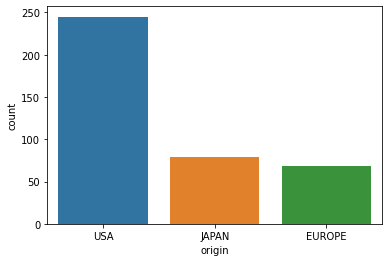

In [25]:
sns.countplot(x=df['origin'])

In [26]:
countries = df.groupby('origin').mean()
countries

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year
origin,,,,,,,
EUROPE,8.980735,4.161765,1.096324,80.558824,1104.795647,16.794118,75.676471
JAPAN,8.055805,4.101266,1.027089,79.835443,1008.437443,16.172152,77.443038
USA,12.891035,6.277551,2.475122,119.048980,1531.110367,14.990204,75.591837


In [27]:
df.groupby(by=['origin', 'cylinders']).mean()

L/100km  displacement  horsepower       weight  \
origin cylinders                                                     
EUROPE 4           8.740635      1.046066   78.311475  1061.585967   
       5           9.094789      1.450000   82.333333  1408.913333   
       6          12.556712      1.597500  113.500000  1535.655000   
JAPAN  3          11.567455      0.725000   99.250000  1088.919000   
       4           7.669409      0.997681   75.579710   977.685710   
       6          10.158249      1.566667  115.833333  1308.428000   
USA    4           8.607788      1.240507   80.956522  1102.035652   
       6          12.241351      2.266438   99.671233  1461.220767   
       8          16.220850      3.450097  158.300971  1868.082175   

                  acceleration  model year  
origin cylinders                            
EUROPE 4             16.727869   75.344262  
       5             18.633333   79.000000  
       6             16.425000   78.250000  
JAPAN  3             13.250000   75.500000  
       4             16.569565   77.507246  
       6             13.550000   78.000000  
USA    4             16.465217   78.043478  
       6             16.467123   75.657534  
       8             12.955340   73.902913

<AxesSubplot:xlabel='origin', ylabel='L/100km'>

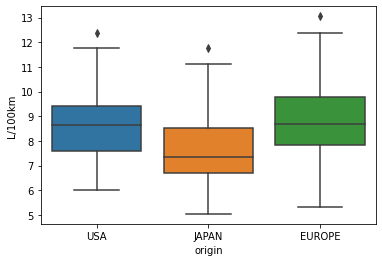

In [28]:
sns.boxplot(data=df, x='origin', y=df[df['cylinders'] == 4]['L/100km'])


<AxesSubplot:xlabel='origin', ylabel='L/100km'>

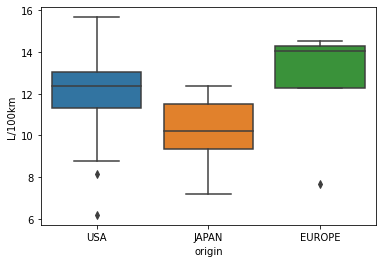

In [29]:
sns.boxplot(data=df, x='origin', y=df[df['cylinders'] == 6]['L/100km'])


# TOP 10 cars with horsepower

In [30]:
horse = df.sort_values(by=['horsepower'], ascending=False).head(10)
horse

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
116,14.687500,8,4.00,230,1942.212,9.5,73,USA,pontiac grand prix
95,19.583333,8,4.55,225,2247.754,11.0,73,USA,buick electra 225 custom
13,16.785714,8,4.55,225,1401.044,10.0,70,USA,buick estate wagon (sw)
8,16.785714,8,4.55,225,2008.950,10.0,70,USA,pontiac catalina
6,16.785714,8,4.54,220,1976.716,9.0,70,USA,chevrolet impala
94,18.076923,8,4.40,215,2149.690,11.0,73,USA,chrysler new yorker brougham
7,16.785714,8,4.40,215,1957.648,8.5,70,USA,plymouth fury iii
25,23.500000,8,3.60,215,2095.210,14.0,70,USA,ford f250
27,21.363636,8,3.18,210,1989.428,13.5,70,USA,dodge d200
67,21.363636,8,4.29,208,2103.382,11.0,72,USA,mercury marquis


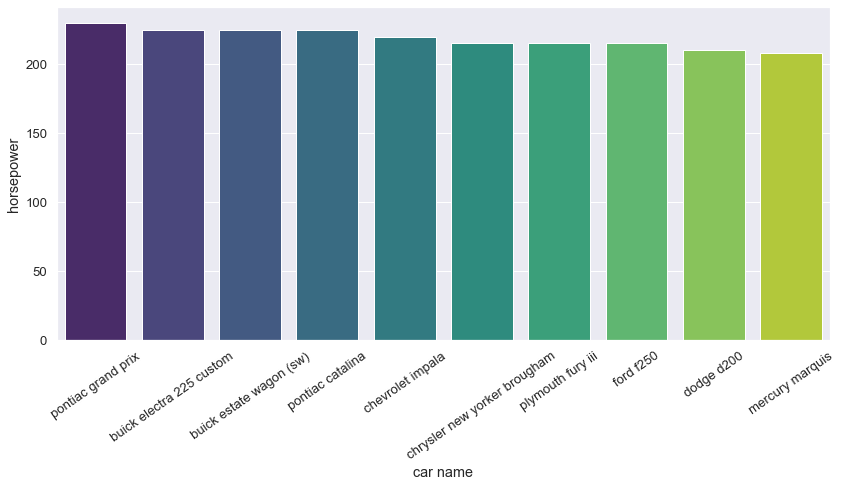

In [31]:
plt.figure(figsize=(12, 7))
sns.set(font_scale=1.2)
plt.xticks(rotation=35)
sns.barplot(data = horse, x='car name', y = 'horsepower', palette='viridis')
plt.tight_layout()


# TOP 10 cars with weight

In [32]:
weight = df.sort_values(by=['weight'], ascending=False).head(10)
weight

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
44,18.076923,8,4.00,175,2333.560,12.0,71,USA,pontiac safari (sw)
103,21.363636,8,4.00,150,2268.638,14.0,73,USA,chevrolet impala
42,19.583333,8,3.83,180,2249.570,11.5,71,USA,dodge monaco (sw)
90,19.583333,8,4.29,198,2248.208,11.5,73,USA,mercury marquis brougham
95,19.583333,8,4.55,225,2247.754,11.0,73,USA,buick electra 225 custom
104,19.583333,8,4.00,167,2227.324,12.5,73,USA,ford country
43,18.076923,8,4.00,170,2154.684,12.0,71,USA,ford country squire (sw)
94,18.076923,8,4.40,215,2149.690,11.0,73,USA,chrysler new yorker brougham
28,26.111111,8,3.04,193,2148.328,18.5,70,USA,hi 1200d
137,18.076923,8,3.50,150,2133.346,14.5,74,USA,buick century luxus (sw)


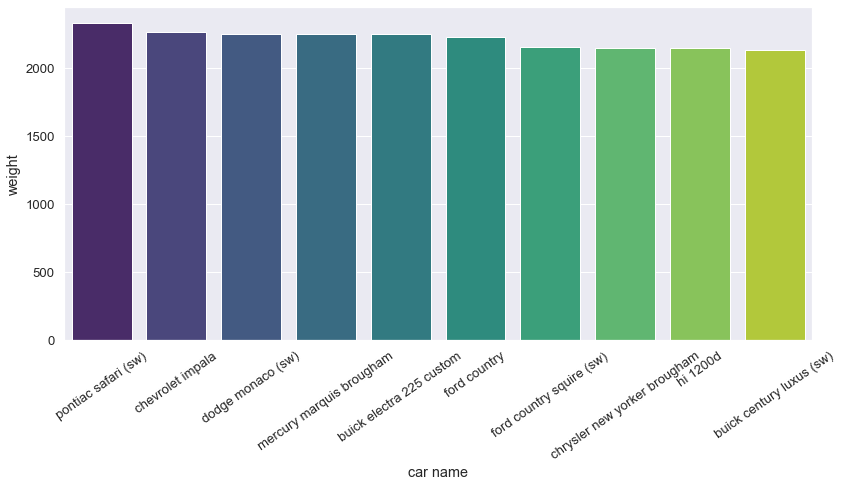

In [33]:
plt.figure(figsize=(12, 7))
sns.set(font_scale=1.2)
plt.xticks(rotation=35)
ax = sns.barplot(data = weight, x='car name', y = 'weight', palette='viridis')
plt.tight_layout()


# TOP 10 cars with displacement

In [34]:
displacement = df.sort_values(by=['displacement'], ascending=False).head(10)
displacement

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
8,16.785714,8,4.55,225,2008.950,10.0,70,USA,pontiac catalina
95,19.583333,8,4.55,225,2247.754,11.0,73,USA,buick electra 225 custom
13,16.785714,8,4.55,225,1401.044,10.0,70,USA,buick estate wagon (sw)
6,16.785714,8,4.54,220,1976.716,9.0,70,USA,chevrolet impala
7,16.785714,8,4.40,215,1957.648,8.5,70,USA,plymouth fury iii
94,18.076923,8,4.40,215,2149.690,11.0,73,USA,chrysler new yorker brougham
90,19.583333,8,4.29,198,2248.208,11.5,73,USA,mercury marquis brougham
5,15.666667,8,4.29,198,1970.814,10.0,70,USA,ford galaxie 500
67,21.363636,8,4.29,208,2103.382,11.0,72,USA,mercury marquis
63,16.785714,8,4.00,175,1990.790,12.0,72,USA,pontiac catalina


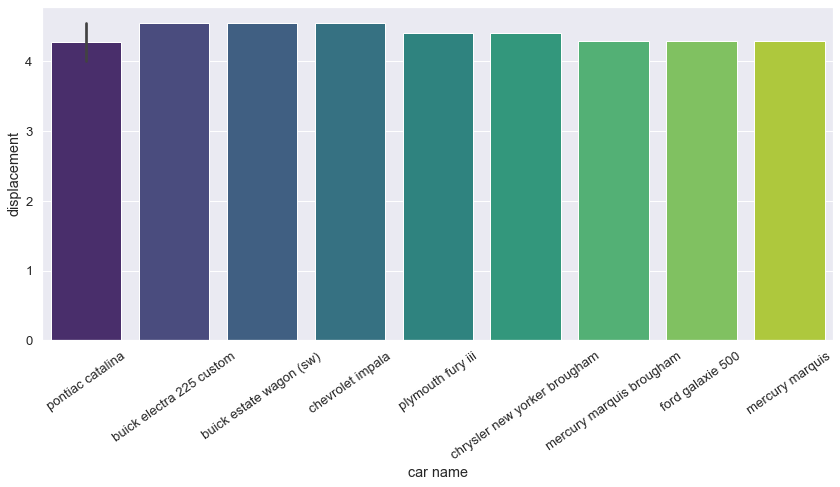

In [35]:
plt.figure(figsize=(12, 7))
sns.set(font_scale=1.2)
plt.xticks(rotation=35)
ax = sns.barplot(data = displacement, x='car name', y = 'displacement', palette='viridis')
plt.tight_layout()


In [36]:
df[df['car name'] == 'pontiac catalina']

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
8,16.785714,8,4.55,225,2008.950,10.0,70,USA,pontiac catalina
63,16.785714,8,4.00,175,1990.790,12.0,72,USA,pontiac catalina
156,14.687500,8,4.00,170,2119.272,11.5,75,USA,pontiac catalina


# TOP 10 cars with consumption

In [37]:
consumption = df.sort_values(by=['L/100km'], ascending=False).head(10)
consumption

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
28,26.111111,8,3.04,193,2148.328,18.5,70,USA,hi 1200d
25,23.500000,8,3.60,215,2095.210,14.0,70,USA,ford f250
26,23.500000,8,3.07,200,1986.704,15.0,70,USA,chevy c20
67,21.363636,8,4.29,208,2103.382,11.0,72,USA,mercury marquis
27,21.363636,8,3.18,210,1989.428,13.5,70,USA,dodge d200
103,21.363636,8,4.00,150,2268.638,14.0,73,USA,chevrolet impala
124,21.363636,8,3.50,180,1663.456,11.0,73,USA,oldsmobile omega
95,19.583333,8,4.55,225,2247.754,11.0,73,USA,buick electra 225 custom
69,19.583333,8,3.50,160,2023.024,13.5,72,USA,oldsmobile delta 88 royale
90,19.583333,8,4.29,198,2248.208,11.5,73,USA,mercury marquis brougham


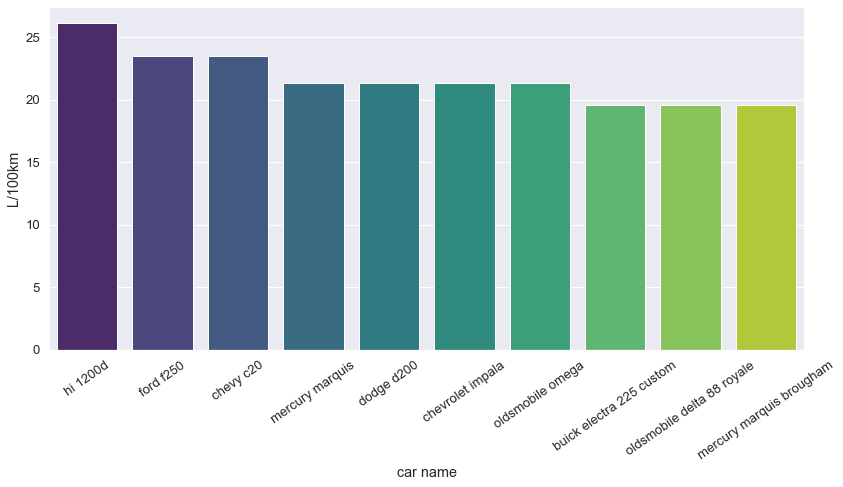

In [38]:
plt.figure(figsize=(12, 7))
sns.set(font_scale=1.2)
plt.xticks(rotation=35)
ax = sns.barplot(data = consumption, x='car name', y = 'L/100km', palette='viridis')
plt.tight_layout()


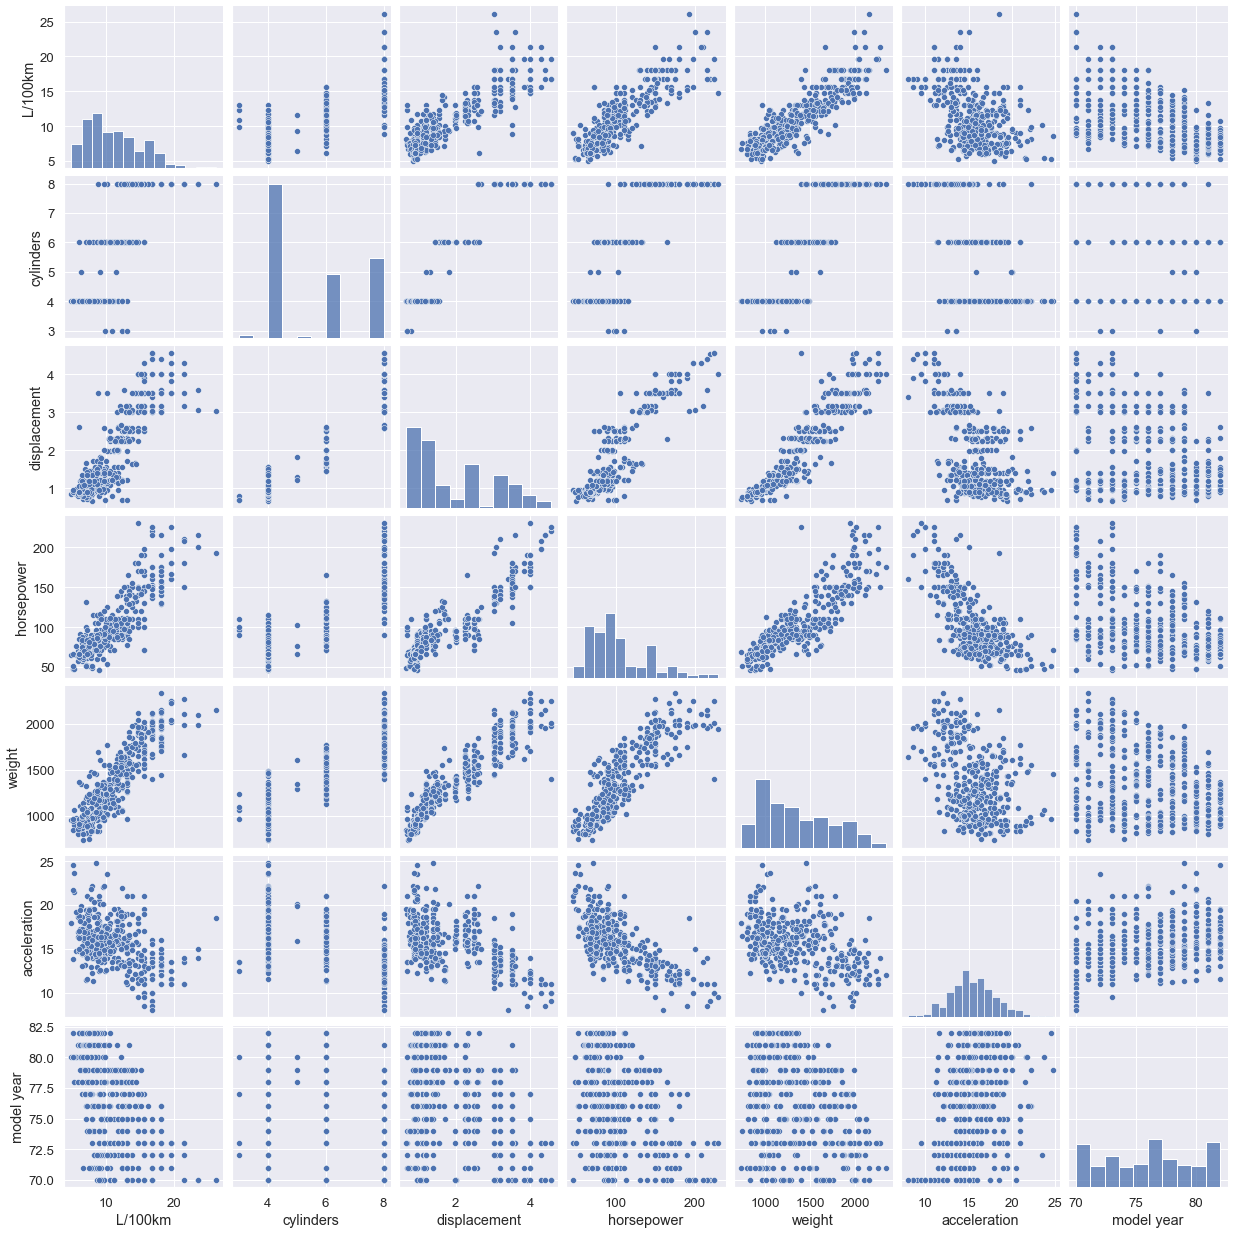

In [39]:
sns.pairplot(df, palette='viridis');

## Updated all the way down

In [40]:
df['multiple'] = df['cylinders'] + df['displacement'] + df['horsepower'] + df['weight']
#Create new column to avoid multicollinearity.

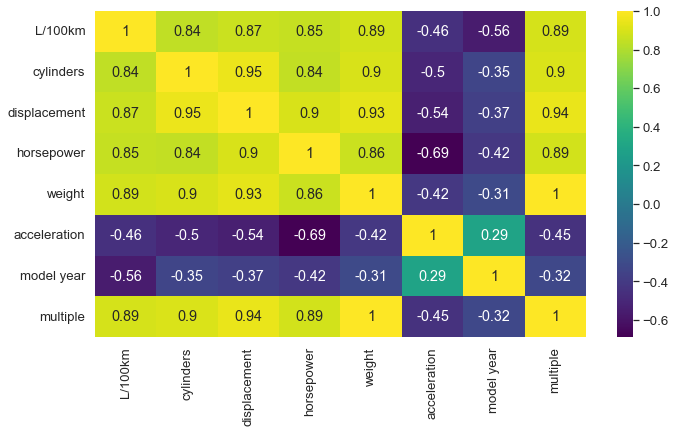

In [41]:
plt.figure(figsize = (11, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis');

# Strong correlation between L/100km, displacement, horsepower, weight
# As cylinders is discrete we do not take them

# Train the test split

In [364]:
from sklearn.model_selection import train_test_split
X = df[['multiple']]
y = df['L/100km']
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 392, dtype: bool

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

# Creating and Training the model

In [331]:
from sklearn.linear_model import LinearRegression


In [332]:
lm = LinearRegression()

In [333]:
lm.fit(X_train, y_train)

LinearRegression()

In [334]:
print(lm.coef_, lm.intercept_)

[0.00819655] -0.7597252083009778


# Model Evaluation

In [335]:
coeff_df = pd.DataFrame(lm.coef_, X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
multiple,0.008197


In [336]:
lm.score(X_train, y_train)


0.78772558765465

In [337]:
lm.score(X_test, y_test)


0.8228978503634929

### R^2 of training data is less than R^2 of test, so it's underfitting 

# Predictions from our Model


In [338]:
X_test.shape

(79, 1)

In [339]:
predictions = lm.predict(X_test)


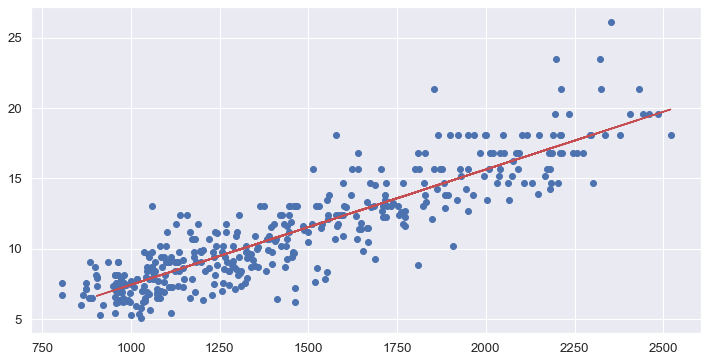

In [344]:
plt.figure(figsize=(12,6))
plt.scatter(X, y)
plt.plot(X_test, predictions, 'r-', label='prediction')

C:\Users\aliha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


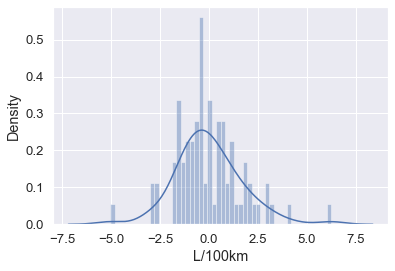

In [345]:
sns.distplot((y_test-predictions),bins=50, kde='True');

# Regression Evaluation Metrics

** MAE, MSE, RMSE **

In [55]:
from sklearn import metrics

In [346]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2:', metrics.r2_score(y_test,predictions))

MAE: 1.2635001578129224
MSE: 2.873349508673709
RMSE: 1.6950957225695866
R2: 0.8228978503634929


In [810]:
from sklearn.model_selection import train_test_split
X = df[['multiple']]
y = df['L/100km']
# X.duplicated()
f = pd.DataFrame(y)


In [811]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [812]:
C = pd.concat([X, f], axis=1)
# X[X.duplicated()]
C.drop(C[C['multiple'].duplicated()].index, inplace =  True)
# C

In [813]:
C.sort_values(by=['multiple'], inplace=True)

In [814]:
X = C['multiple'].to_numpy().reshape(-1, 1)
y = C['L/100km'].to_numpy().reshape(-1, 1)


In [823]:
lim = LinearRegression()
lim.fit(X_train, y_train)
print(lim.intercept_, lim.coef_)

-1.1020342953661988 [0.00838181]


In [815]:
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
theta_best

array([-1.1020343 ,  0.00838181])

In [816]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([-1.1020343 , -1.08527067])

# SGD 

In [839]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=100, penalty=None, eta0=1, random_state=42)
sgd_reg.fit(X_train, y_train.ravel())

SGDRegressor(eta0=1, max_iter=100, penalty=None, random_state=42)

In [840]:
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.24901042e+12] [-4.56604475e+13]


# Polynomial

In [824]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)


In [825]:
X[0]

array([805.406])

In [826]:
X_poly[0]

array([   805.406   , 648678.824836])

In [827]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [828]:
lin_reg = LinearRegression()


In [829]:
lin_reg.fit(X_poly,y)
print(lin_reg.intercept_, lin_reg.coef_)


[1.81151269] [[4.57632728e-03 1.17082067e-06]]


SGDRegressor(eta0=0.1, max_iter=100, penalty=None, random_state=42)

[5.05891796e+11] [-4.5600947e+12]


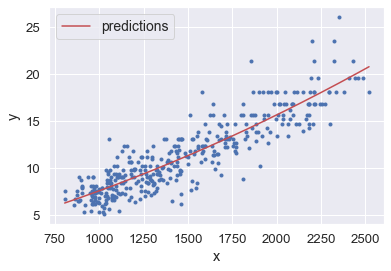

In [741]:
y_new = lin_reg.predict(X_poly)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X, y, 'b.')
plt.plot(X, y_new, c='r',label='predictions')
# plt.axis([1399.5, 1400, 10.5, 10.6])
plt.legend(loc="upper left", fontsize=14)


In [742]:
from sklearn.metrics import mean_squared_error

In [743]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    
    plt.xlabel('Size')
    plt.ylabel("RMSE")
    plt.plot(np.sqrt(train_errors), 'r-+', lw=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', lw=3, label='val')  
    plt.legend()

(0.0, 150.0, 0.0, 4.0)

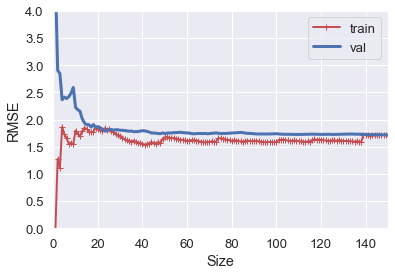

In [744]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0,150, 0, 4])

(0.0, 150.0, 0.0, 4.0)

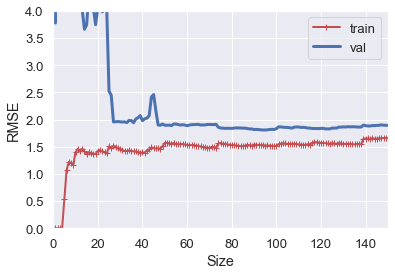

In [746]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features',
        PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
    ])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 150, 0, 4])           # not shown
# plt.grid(False)